In [1]:
import torch
import sys
sys.path.insert(0, '../src')  # Adjust the path to the root of the package

from capstone.settings import Cartpole
from capstone.training import Trainer
from capstone.evaluation import Evaluator

from capstone.barriers import NNDM_H
from capstone.cbf import CBF

from capstone.nndm import NNDM
from capstone.dqn import DQN
from capstone.ddpg import Actor

In [2]:
env = Cartpole()

In [3]:
import os
print(os.getcwd())

C:\Users\ruben\PycharmProjects\Capstone\examples


  0%|          | 0/200 [00:00<?, ?it/s]

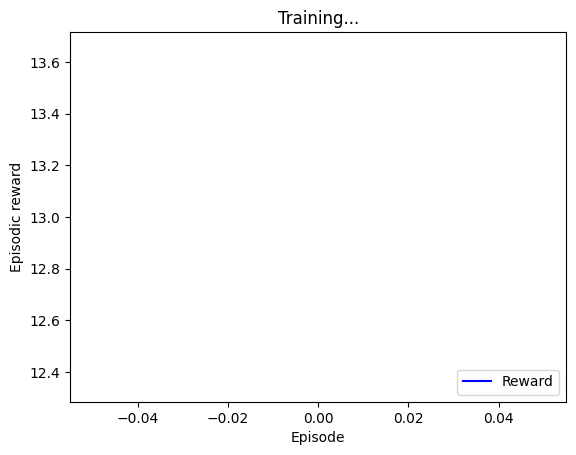

  0%|          | 1/200 [00:00<00:51,  3.88it/s]

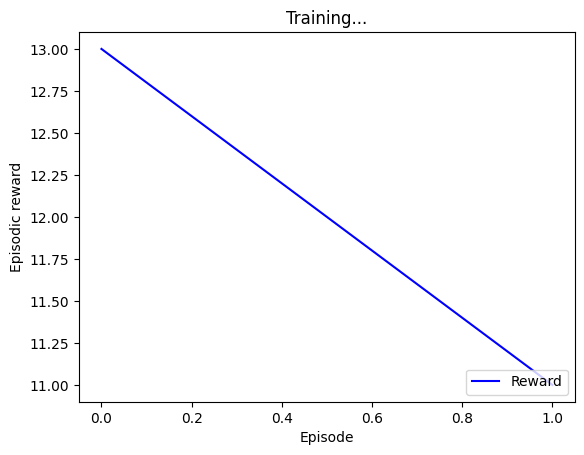

  1%|          | 2/200 [00:00<00:51,  3.84it/s]

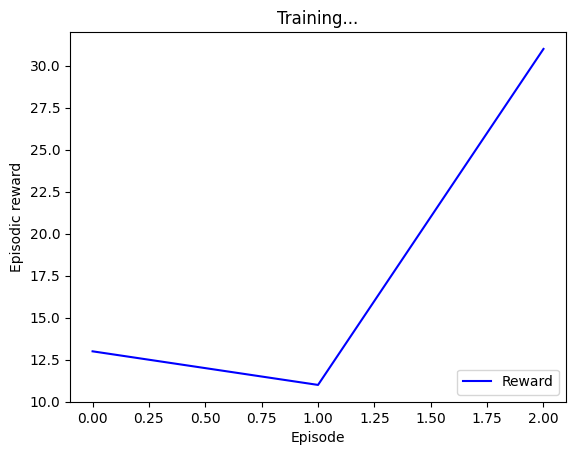

  2%|▏         | 3/200 [00:00<00:53,  3.67it/s]

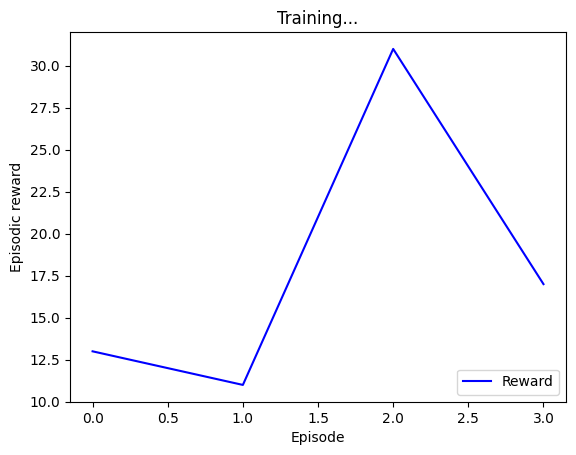

  2%|▏         | 4/200 [00:01<01:01,  3.19it/s]

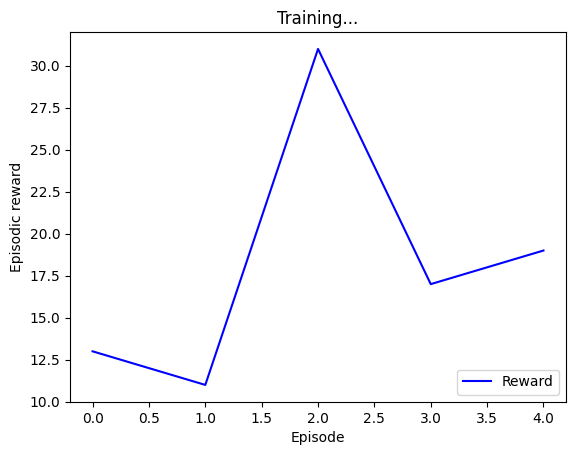

  2%|▎         | 5/200 [00:01<00:59,  3.30it/s]

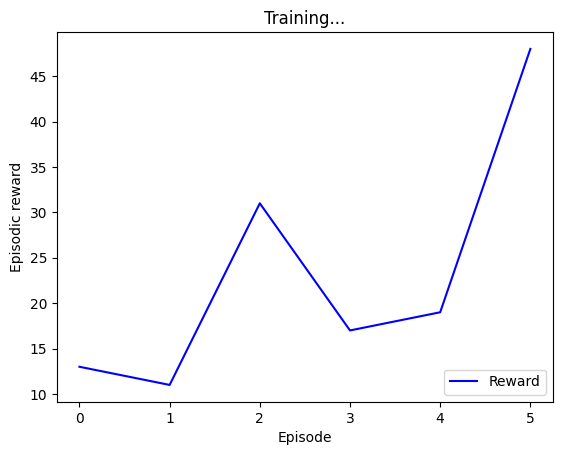

  3%|▎         | 6/200 [00:01<01:01,  3.14it/s]

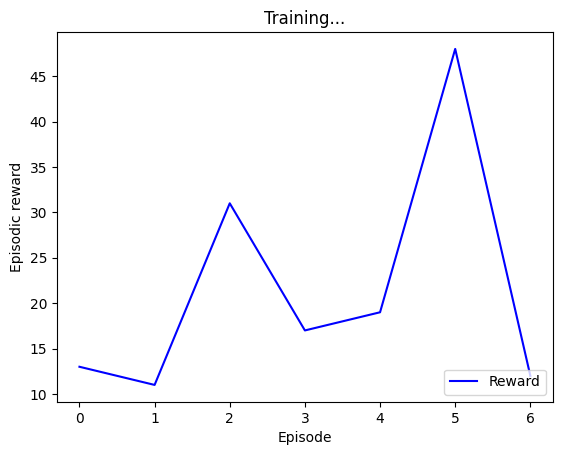

  4%|▎         | 7/200 [00:02<01:07,  2.87it/s]

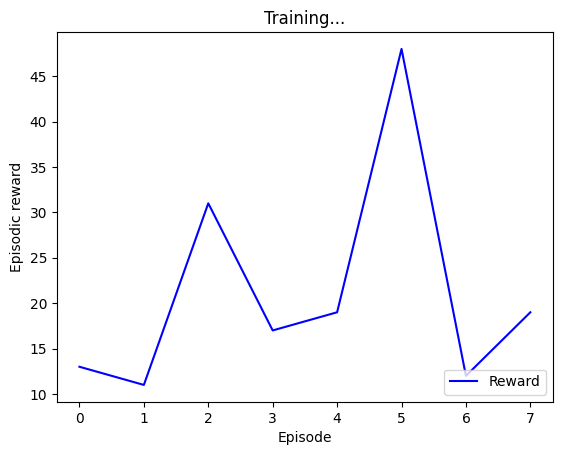

  4%|▍         | 8/200 [00:02<01:06,  2.88it/s]

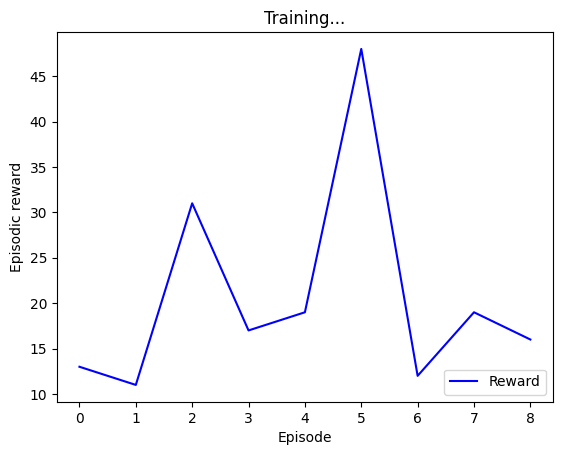

  4%|▍         | 9/200 [00:02<01:06,  2.87it/s]

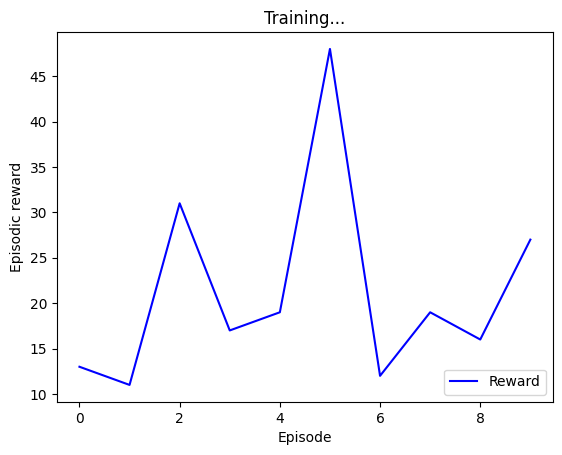

  5%|▌         | 10/200 [00:03<01:10,  2.68it/s]

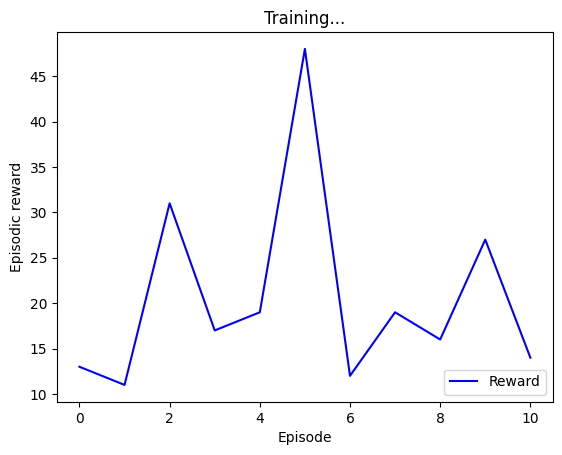

  6%|▌         | 11/200 [00:03<01:06,  2.83it/s]

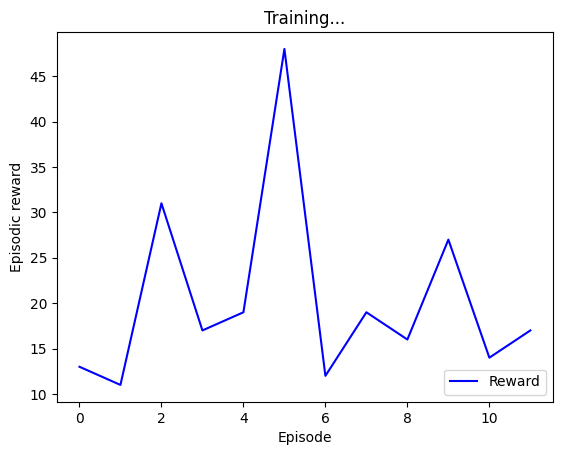

  6%|▌         | 12/200 [00:03<01:04,  2.91it/s]

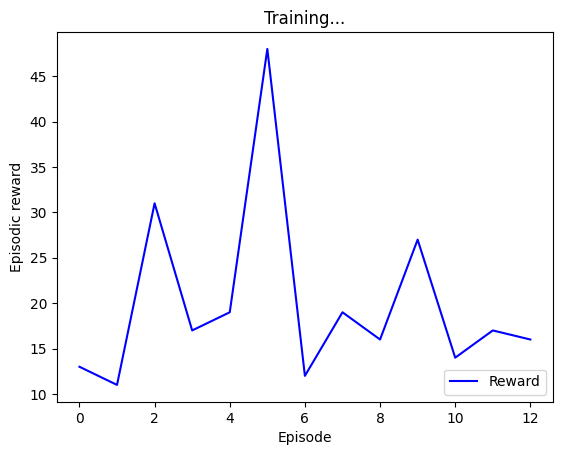

  6%|▋         | 13/200 [00:04<01:01,  3.02it/s]

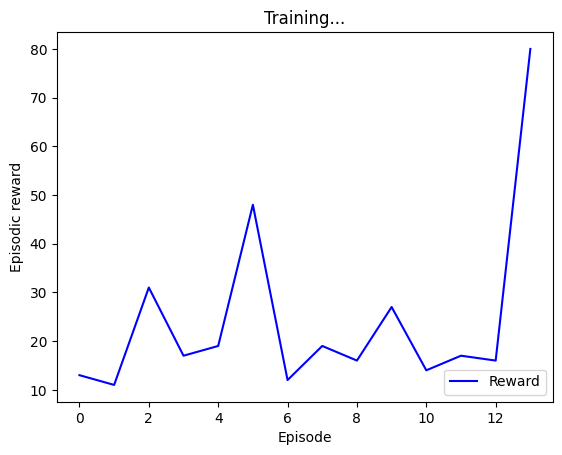

  7%|▋         | 14/200 [00:04<01:17,  2.39it/s]

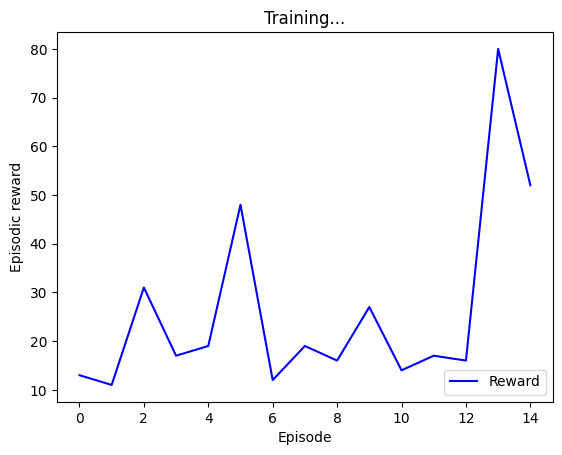

  8%|▊         | 15/200 [00:05<01:23,  2.23it/s]

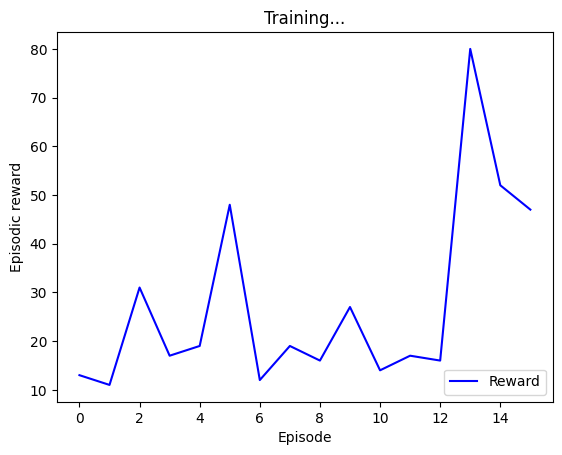

  8%|▊         | 16/200 [00:05<01:25,  2.14it/s]

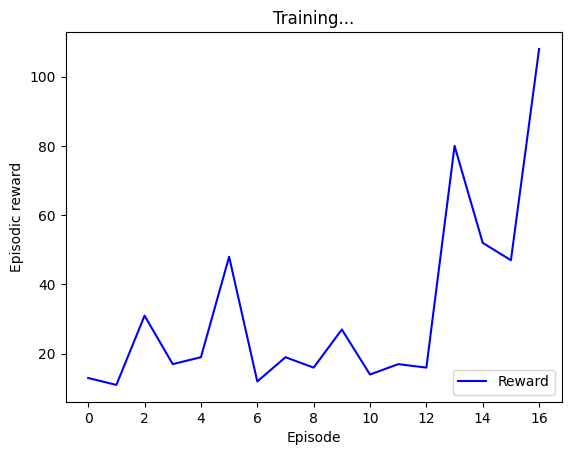

  8%|▊         | 17/200 [00:06<01:45,  1.74it/s]

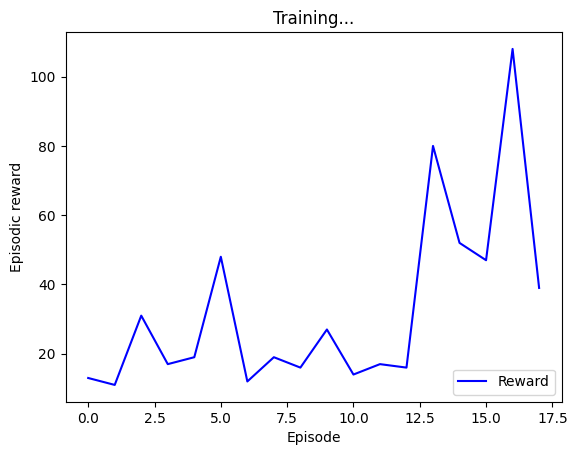

  9%|▉         | 18/200 [00:07<01:37,  1.87it/s]

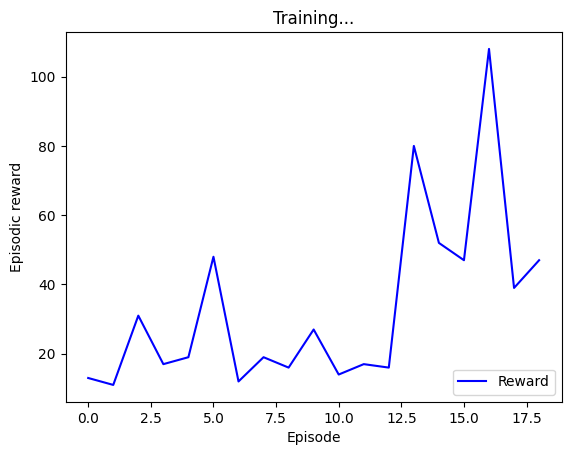

 10%|▉         | 19/200 [00:07<01:35,  1.90it/s]

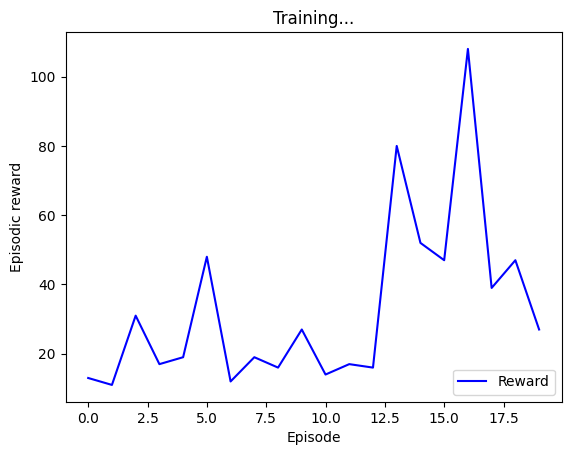

 10%|█         | 20/200 [00:08<01:27,  2.07it/s]

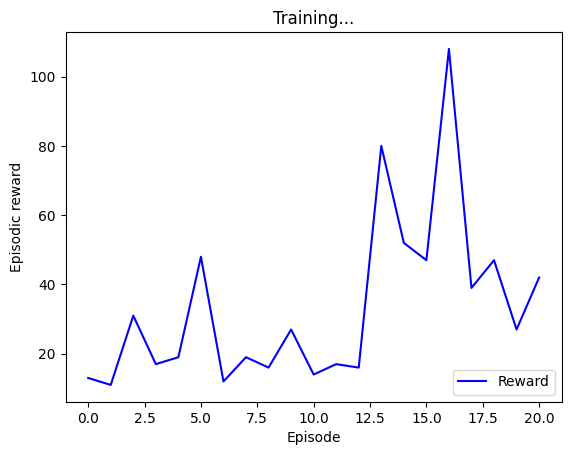

 10%|█         | 21/200 [00:08<01:25,  2.10it/s]

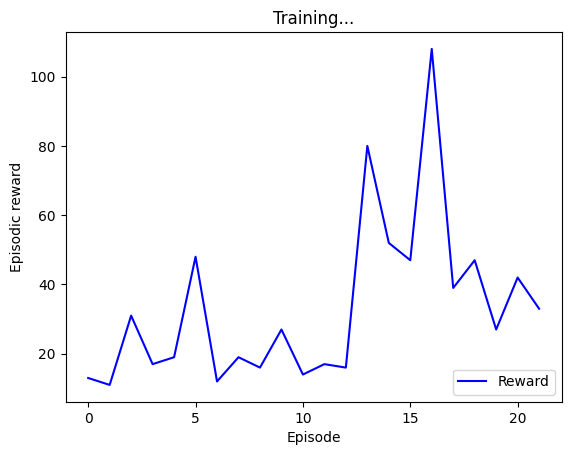

 11%|█         | 22/200 [00:08<01:20,  2.21it/s]

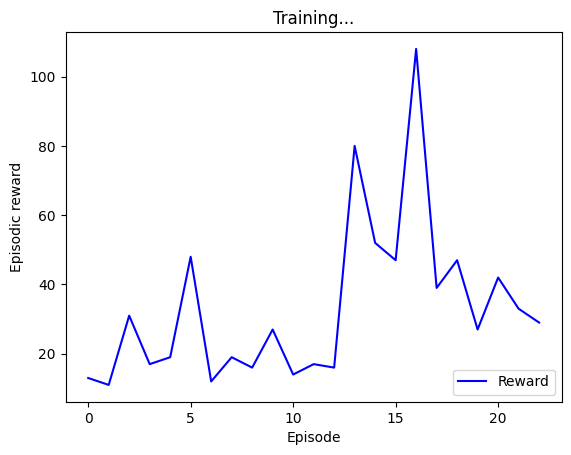

 12%|█▏        | 23/200 [00:09<01:15,  2.35it/s]

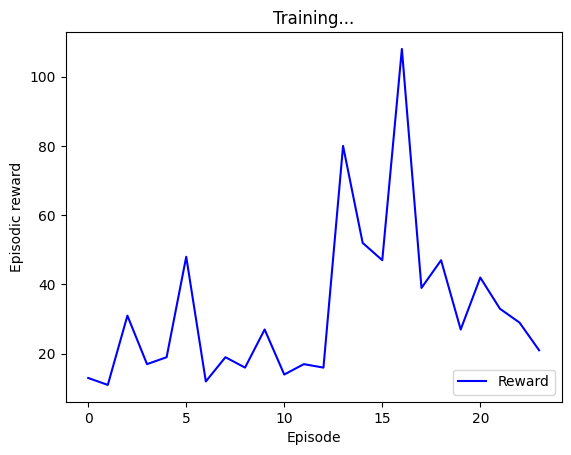

 12%|█▏        | 24/200 [00:09<01:08,  2.56it/s]

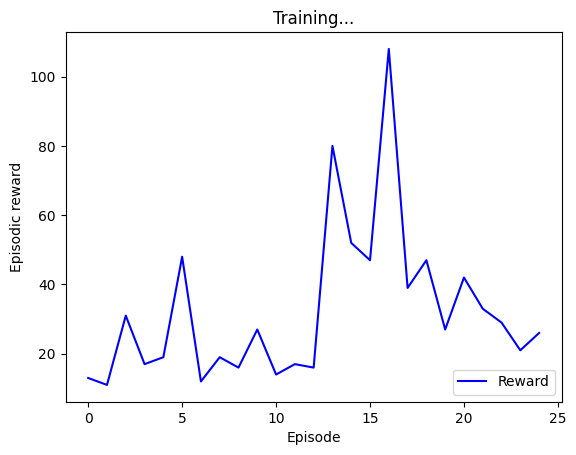

 12%|█▎        | 25/200 [00:09<01:07,  2.58it/s]

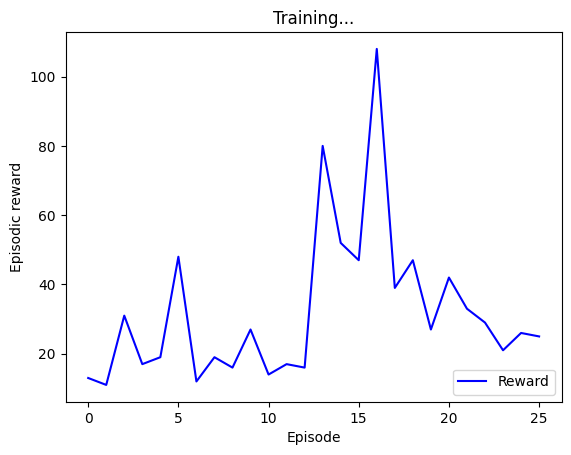

 13%|█▎        | 26/200 [00:10<01:06,  2.63it/s]

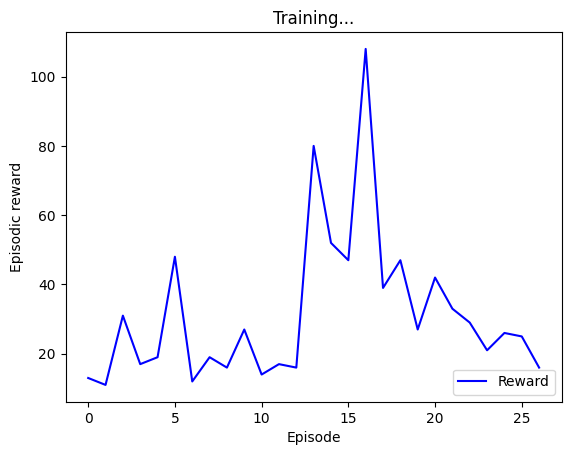

 14%|█▎        | 27/200 [00:10<01:01,  2.80it/s]

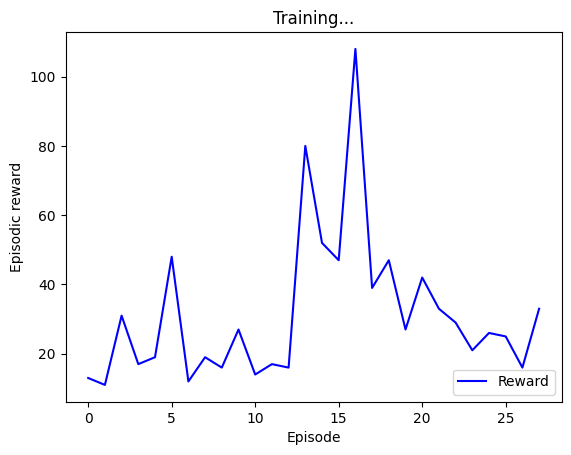

 14%|█▍        | 28/200 [00:11<01:05,  2.61it/s]

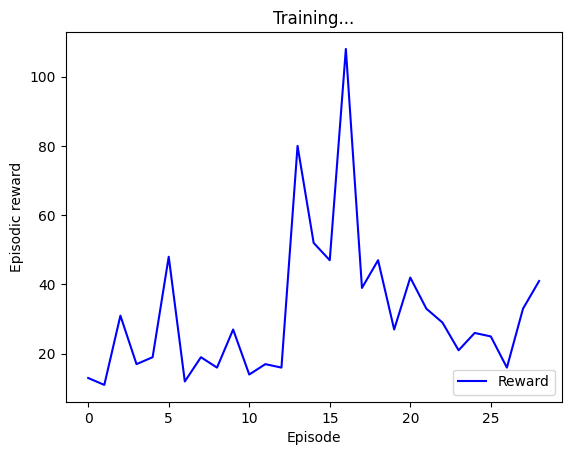

 14%|█▍        | 29/200 [00:11<01:08,  2.49it/s]

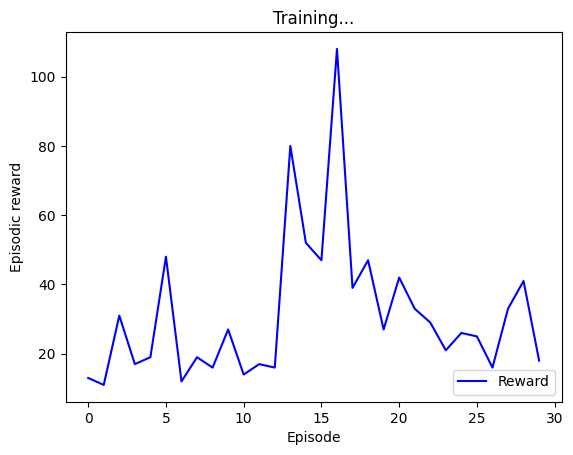

 15%|█▌        | 30/200 [00:11<01:04,  2.63it/s]

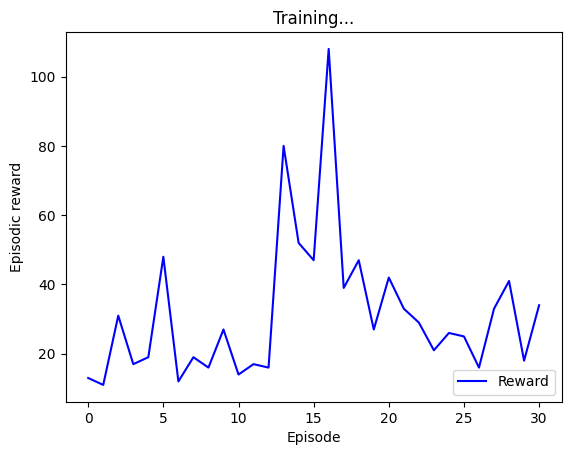

 16%|█▌        | 31/200 [00:12<01:07,  2.51it/s]

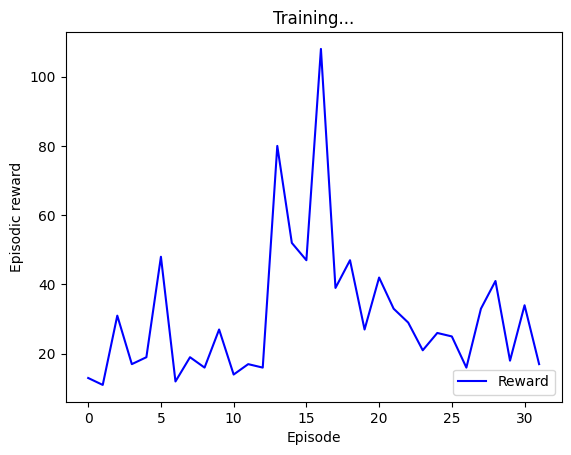

 16%|█▌        | 32/200 [00:12<01:06,  2.52it/s]

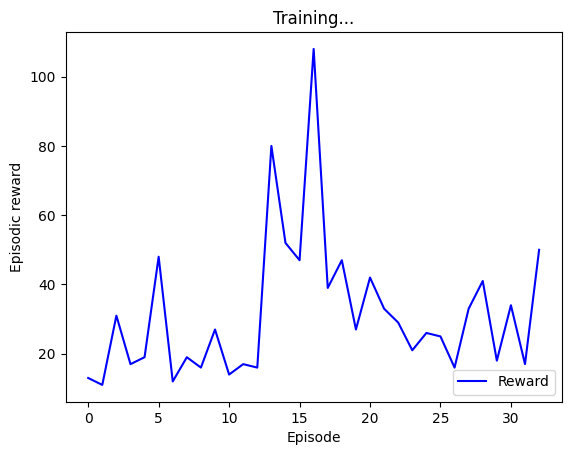

 16%|█▋        | 33/200 [00:13<01:13,  2.28it/s]

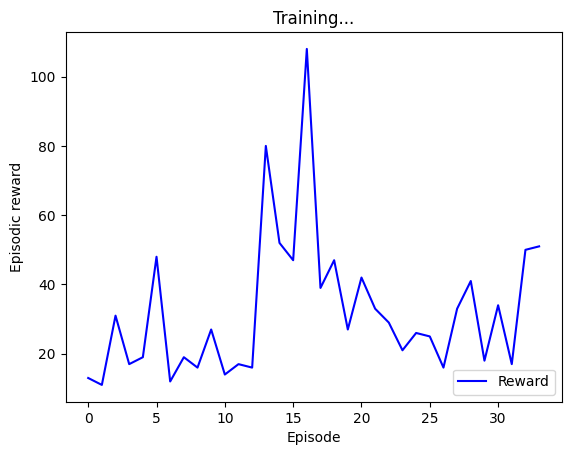

 17%|█▋        | 34/200 [00:13<01:14,  2.21it/s]

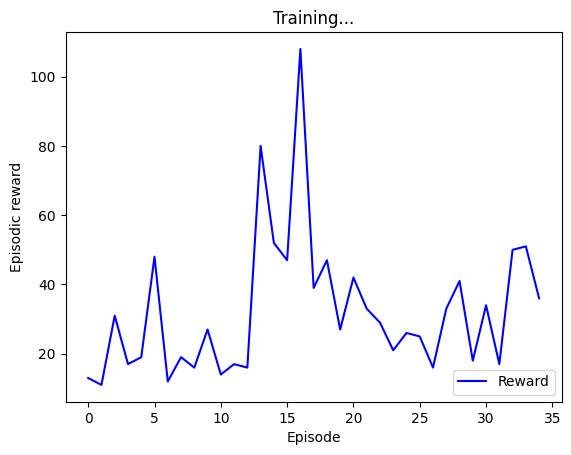

 18%|█▊        | 35/200 [00:14<01:12,  2.27it/s]

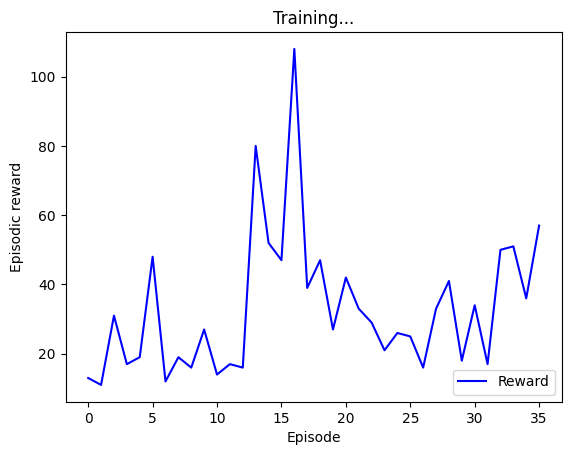

 18%|█▊        | 36/200 [00:14<01:18,  2.08it/s]

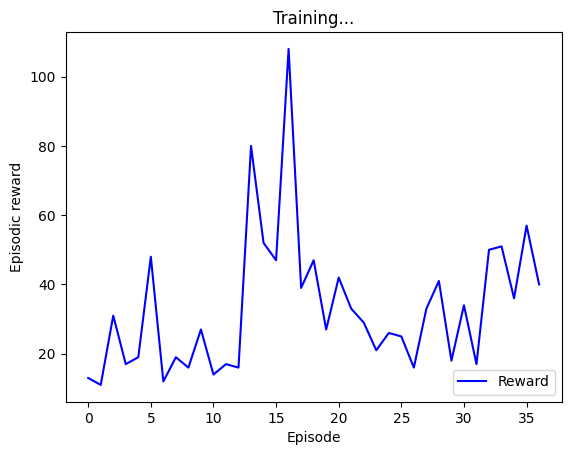

 18%|█▊        | 37/200 [00:15<01:17,  2.10it/s]

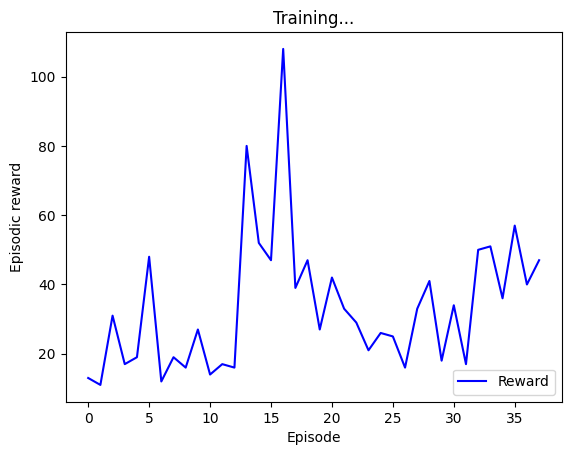

 19%|█▉        | 38/200 [00:15<01:16,  2.13it/s]

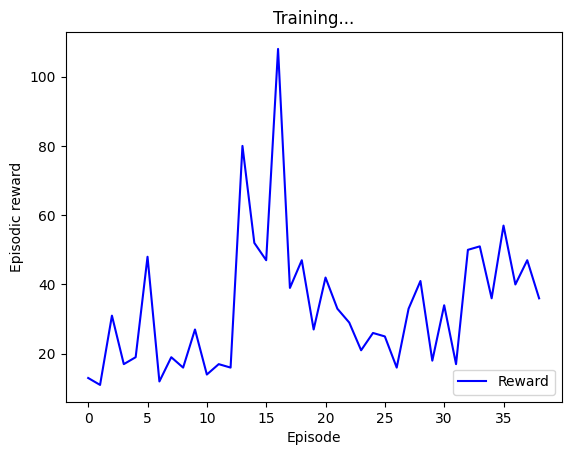

 20%|█▉        | 39/200 [00:16<01:15,  2.12it/s]

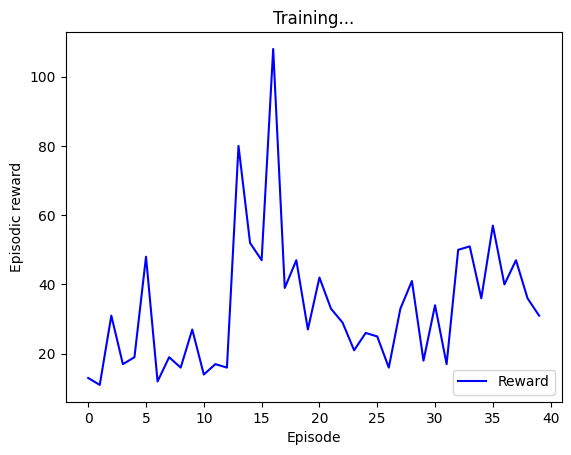

 20%|██        | 40/200 [00:16<01:14,  2.14it/s]

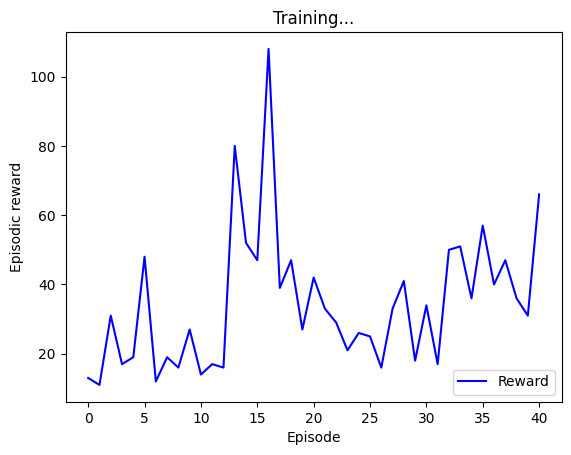

 20%|██        | 41/200 [00:17<01:21,  1.95it/s]

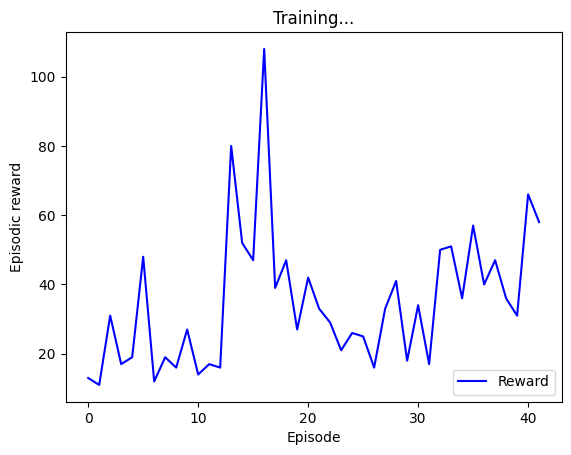

 21%|██        | 42/200 [00:17<01:24,  1.86it/s]

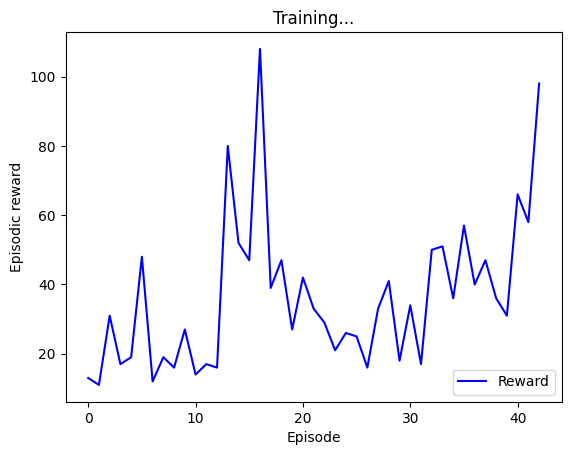

 22%|██▏       | 43/200 [00:18<01:34,  1.66it/s]

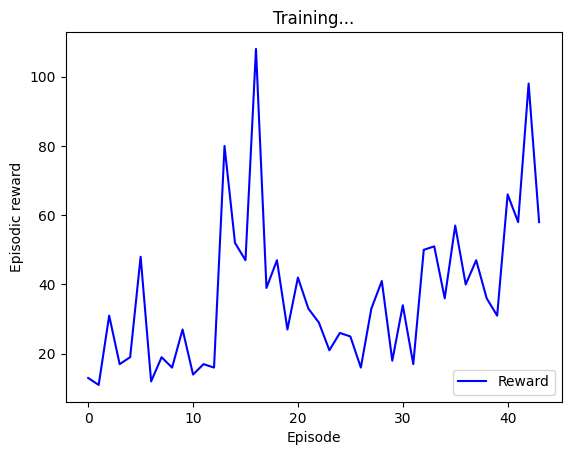

 22%|██▏       | 44/200 [00:19<01:31,  1.70it/s]

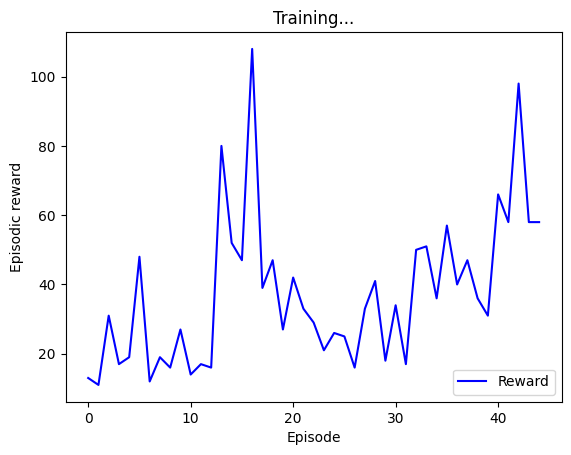

 22%|██▎       | 45/200 [00:19<01:36,  1.61it/s]

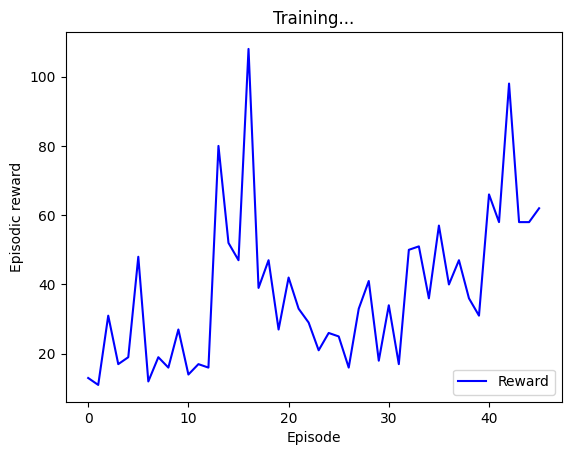

 23%|██▎       | 46/200 [00:20<01:35,  1.62it/s]

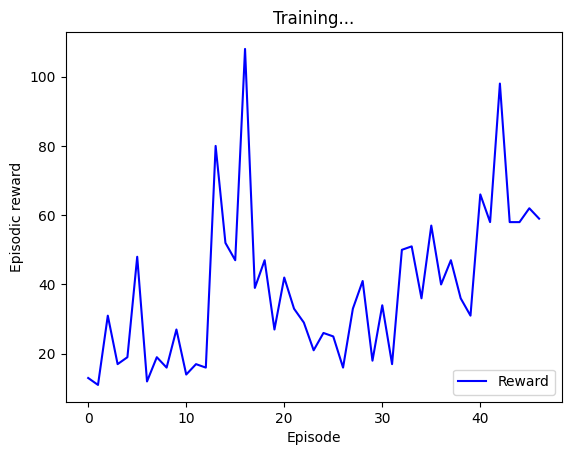

 23%|██▎       | 46/200 [00:20<01:10,  2.19it/s]


KeyboardInterrupt: 

In [4]:
pipeline = Trainer(env)
policy, nndm = pipeline.train()

torch.save(policy.state_dict(), f'../Agents/{type(env).__name__}')
torch.save(nndm.state_dict(), f'../NNDMs/{type(env).__name__}')

In [11]:
policy = DQN(env) if env.is_discrete else Actor(env)
policy_params = torch.load(f'../Agents/{type(env).__name__}')
policy.load_state_dict(policy_params)

nndm = NNDM(env)
nndm_params = torch.load(f'../NNDMs/{type(env).__name__}')
nndm.load_state_dict(nndm_params)

evaluator = Evaluator(env)

h = NNDM_H(env, nndm)
cbf = CBF(env, h, policy, alpha=0.9)

evaluator.play(policy)
evaluator.nice_plots(policy, 0.9, 0, 10, 500, 1)